In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Practice DS/netflix_titles.csv')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.shape

(8807, 12)

In [6]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
box=data.iloc[:,:11]
box

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [10]:
data.select_dtypes('object').columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
data.select_dtypes('int64').columns

Index(['release_year'], dtype='object')

In [12]:
object_columns=data.select_dtypes('object').columns
int_columns=data.select_dtypes('int64').columns
for c in data.columns:
    if c in object_columns:
        data[c]=data[c].fillna('Not Available')

    if c in int_columns:
        data[c]=data[c].fillna(0)


In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
data['release_month']=data['date_added'].str.split(' ').str[0]

In [16]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September


In [17]:
data['year_added']=data['date_added'].str.split(' ').str[2]

In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [19]:
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
release_month     0
year_added       10
dtype: int64

In [20]:
data['year_added']=data['year_added'].fillna('0')

In [21]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
year_added       0
dtype: int64

In [22]:
data.drop(columns=['date_added'],axis=1,inplace=True)

In [23]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,release_month,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [24]:
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [25]:
data['duration']=data['duration'].str.replace('Seasons','Season')

In [26]:
data.describe(include=['O'])

,show_id,type,title,director,cast,country,rating,duration,listed_in,description,release_month,year_added
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,18,221,514,8775,14,41
top,s1,Movie,Dick Johnson Is Dead,Not Available,Not Available,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",July,2019
freq,1,6131,1,2634,825,2818,3207,1793,362,4,819,1999


In [27]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

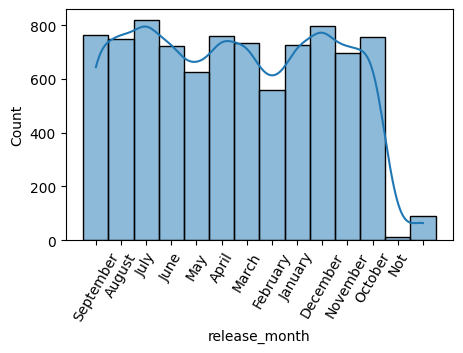

In [28]:
plt.figure(figsize=(5,3))
sns.histplot(x=data['release_month'],kde=True)
plt.xticks(rotation=60)
plt.show()

In [29]:
data['release_month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8807 entries, 0 to 8806
Series name: release_month
Non-Null Count  Dtype 
--------------  ----- 
8807 non-null   object
dtypes: object(1)
memory usage: 68.9+ KB


In [30]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,release_month,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Season,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Season,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


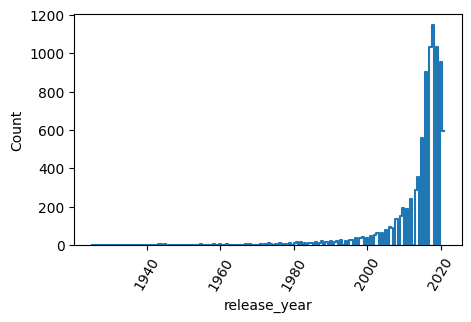

In [31]:
plt.figure(figsize=(5,3))
sns.histplot(x=data['release_year'],element='step',fill=False)
plt.xticks(rotation=60)
plt.show()

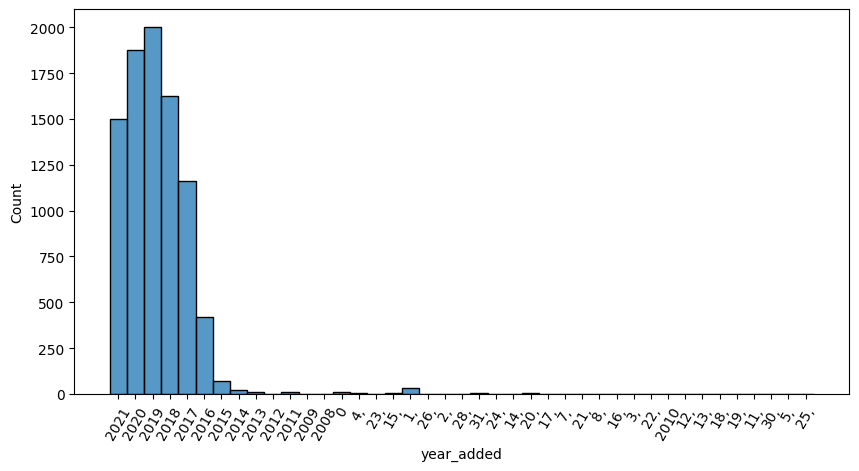

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(x=data['year_added'])
plt.xticks(rotation=60)
plt.show()

In [33]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Not Available', 'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
data['rating']=data['rating'].replace({'74 min':'Not Available','84 min':'Not Available','66 min':'Not Available'})

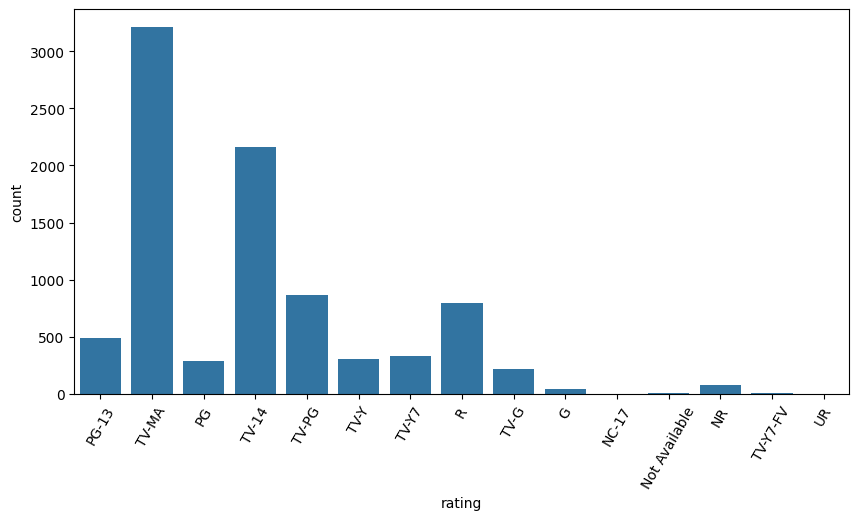

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['rating'])
plt.xticks(rotation=60)
plt.show()

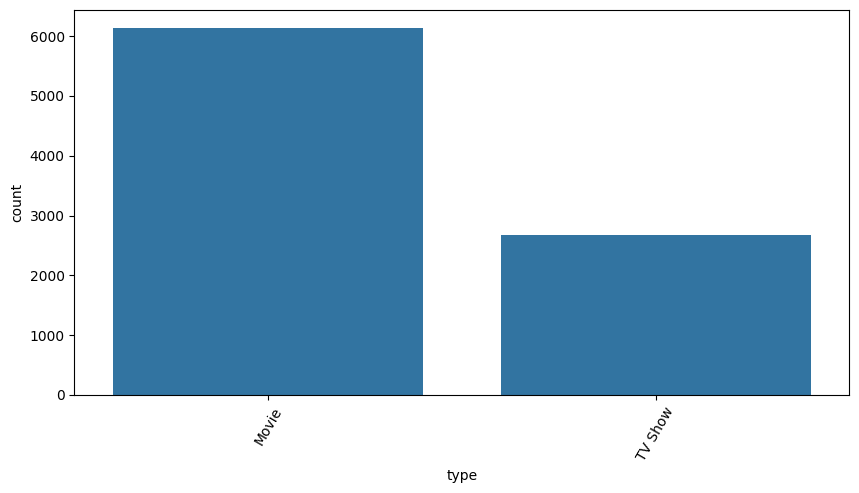

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['type'])
plt.xticks(rotation=60)
plt.show()

In [37]:
data.head(1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,release_month,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021


In [38]:
data_type_year=data.groupby(['type','year_added']).agg({'type':'count'})
data_type_year

type
type    year_added      
Movie   2008           1
        2009           2
        2010           1
        2011          13
        2012           3
        2013           6
        2014          19
        2015          56
        2016         253
        2017         839
        2018        1237
        2019        1424
        2020        1284
        2021         993
TV Show 0             10
        1,            33
        11,            1
        12,            2
        13,            2
        14,            2
        15,            6
        16,            3
        17,            2
        18,            2
        19,            1
        2,             1
        20,            4
        2008           1
        2013           4
        2014           4
        2015          17
        2016         165
        2017         325
        2018         388
        2019         575
        2020         594
        2021         505
        21,            1
        22,            2
        23,            1
        24,            1
        25,            1
        26,            2
        28,            3
        3,             2
        30,            1
        31,            6
        4,             4
        5,             1
        7,             1
        8,             3

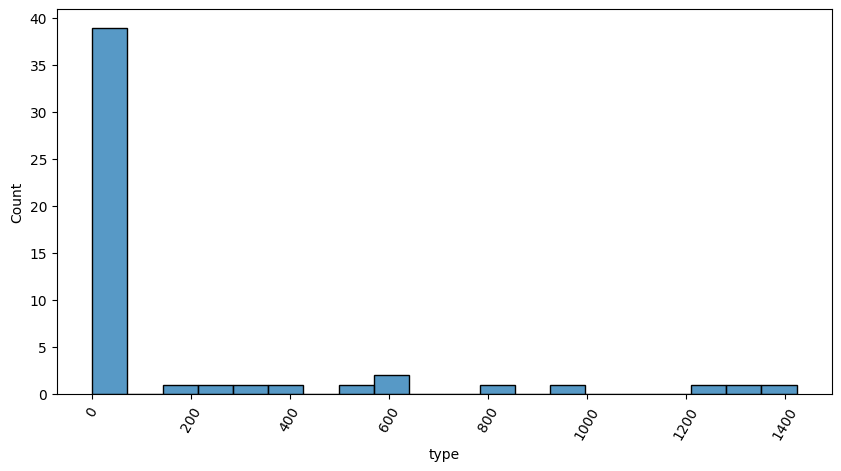

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_type_year,x='type',bins=20)
plt.xticks(rotation=60)
plt.show()

In [40]:
data[['duration_time','duration_char']]=data['duration'].str.split(' ',expand=True)

In [41]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,release_month,year_added,duration_time,duration_char
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,90,min
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Season,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,2,Season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,1,Season
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,1,Season
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Season,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,2,Season


In [42]:
def time(row):
    if(row['duration_char']=='min'):
        return row['duration_time']
    else:
        return 0



In [43]:
data['duration_min']=data.apply(time,axis=1)

In [44]:
def season(row):
    if(row['duration_char']=='Season'):
        return row['duration_time']
    else:
        return 0


In [45]:
data['duration_season']=data.apply(season,axis=1)

In [46]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,release_month,year_added,duration_time,duration_char,duration_min,duration_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,90,min,90,0
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Season,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,2,Season,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,1,Season,0,1
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,1,Season,0,1
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Season,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,2,Season,0,2


In [47]:
data.drop(columns=['duration','duration_time','duration_char'],axis=1,inplace=True)

In [48]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,listed_in,description,release_month,year_added,duration_min,duration_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",September,2021,90,0
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,0,1
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,0,1
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,0,2


In [49]:
data['duration_min']=data['duration_min'].astype(int)

In [50]:
data['duration_season']=data['duration_season'].astype(int)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          8807 non-null   object
 1   type             8807 non-null   object
 2   title            8807 non-null   object
 3   director         8807 non-null   object
 4   cast             8807 non-null   object
 5   country          8807 non-null   object
 6   release_year     8807 non-null   int64 
 7   rating           8807 non-null   object
 8   listed_in        8807 non-null   object
 9   description      8807 non-null   object
 10  release_month    8807 non-null   object
 11  year_added       8807 non-null   object
 12  duration_min     8807 non-null   int64 
 13  duration_season  8807 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 963.4+ KB


In [56]:
count_movies=0
count_webseries=0
for i in data['duration_min']:
    if i==0:
        count_webseries+=1
    else:
        count_movies+=1
print('Movies:',count_movies,'\nWebSeries:',count_webseries)

Movies: 6128 
WebSeries: 2679


In [53]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [54]:
data[data['duration_season']==data['duration_season'].max()]

,show_id,type,title,director,cast,country,release_year,rating,listed_in,description,release_month,year_added,duration_min,duration_season
548,s549,TV Show,Grey's Anatomy,Not Available,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020,TV-14,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,July,2021,0,17


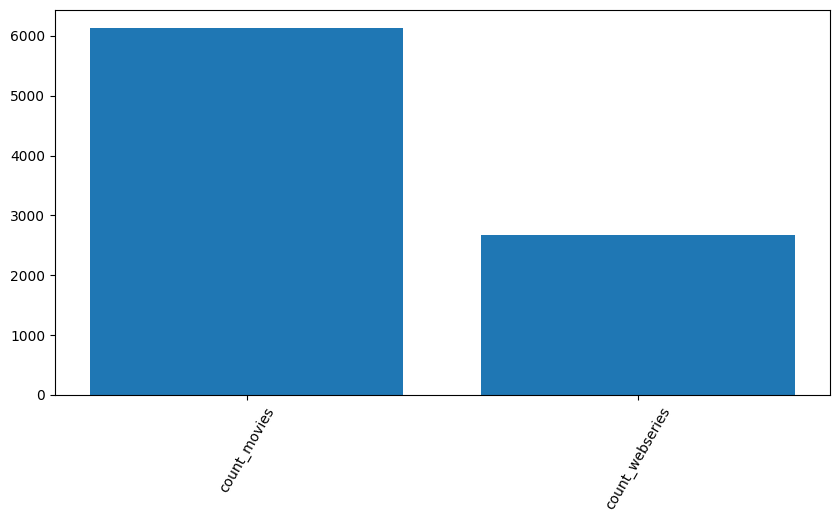

In [61]:
cat=['count_movies','count_webseries']
count=[6128,2679]
plt.figure(figsize=(10,5))
plt.bar(cat,count)
plt.xticks(rotation=60)
plt.show()

In [64]:
for index,row in data.iterrows():
    if 'Keanu Reeves' in row['cast']:
        print(row['title'])

The Whole Truth
SPF-18
The Bad Batch
To the Bone
Knock Knock
Man of Tai Chi
Something's Gotta Give
The Lake House
The Matrix
The Matrix Reloaded
The Matrix Revolutions


In [69]:
for index,row in data.iterrows():
    if 'India' in row['country'] and row['type']=='Movie':
        print(row['title'], '||', row['director'], '||', row['type'], '||' ,row['rating'])

Jeans || S. Shankar || Movie || TV-14
Paranoia || Robert Luketic || Movie || PG-13
Angamaly Diaries || Lijo Jose Pellissery || Movie || TV-14
Anjaam || Rahul Rawail || Movie || TV-14
Dhanak || Nagesh Kukunoor || Movie || TV-PG
Gurgaon || Shanker Raman || Movie || TV-14
Shikara || Vidhu Vinod Chopra || Movie || TV-14
Thimmarusu || Sharan Koppisetty || Movie || TV-14
C Kkompany || Sachin Yardi || Movie || TV-14
EMI: Liya Hai To Chukana Padega || Saurabh Kabra || Movie || TV-14
Koi Aap Sa || Partho Mitra || Movie || TV-14
Krishna Cottage || Santram Varma || Movie || TV-14
Kucch To Hai || Anil V. Kumar, Anurag Basu || Movie || TV-14
Kyaa Kool Hai Hum || Sangeeth Sivan || Movie || TV-MA
Kyaa Kool Hain Hum 3 || Umesh Ghadge || Movie || TV-MA
Kyaa Super Kool Hain Hum || Sachin Yardi || Movie || TV-MA
Kyo Kii... Main Jhuth Nahin Bolta || David Dhawan || Movie || TV-14
LSD: Love, Sex Aur Dhokha || Dibakar Banerjee || Movie || TV-MA
Mission Istaanbul: Darr Ke Aagey Jeet Hai || Apoorva Lakhia || 